**Catalog**
- Gradient Descent
- Linear Regression
- Logistic Regression

https://github.com/AryeYellow/PyProjects/blob/master/DataScience/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%92%8C%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
%matplotlib inline
import matplotlib.pyplot as mp, numpy as np
np.random.seed(2)

## 梯度下降

**梯度**
- 是一个向量，表示某一函数在该点处的方向导数沿着该方向取得最大值

**梯度下降**
- 沿梯度下降的方向求解极小值，是机器学习中常用的迭代算法

**梯度下降算法**：以 $f(x)=x^2−2x+1$ 为例，求函数的极值点
- 求导数：$f'(x)=2x−2$
- 计算机使用迭代的方法，一步一步逼近极值点（向梯度相反的方向移动）
- 迭代公式：$x_{i+1}=x_i-\alpha\frac{\partial f(x_i)}{x_i}=x_i-\alpha(2x_i-2)$

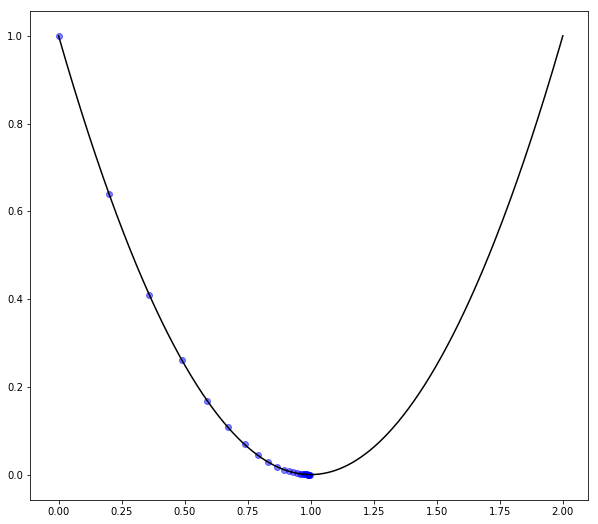

In [2]:
"""原函数"""
fn = lambda x: x ** 2 - 2 * x + 1
x = np.linspace(0, 2, 9999)
mp.figure(figsize=(10,9))
mp.plot(x, fn(x), c='black')  # 绘制函数曲线

"""导数"""
derivative = lambda x: 2 * x - 2

"""梯度下降求极值点"""
extreme_point = 0  # 初始化极值点
alpha = 0.1  # 学习速率
presision = 0.001  # 允许误差范围
error = np.inf  # 初始化误差
while abs(error) >= presision:  # 误差足够小时退出迭代
    mp.scatter(extreme_point, fn(extreme_point), c='b', alpha=.5)  # 绘制散点
    error = alpha * derivative(extreme_point)  # 步伐
    extreme_point -= error  # 梯度下降
mp.show()

## 线性回归
https://blog.csdn.net/Yellow_python/article/details/81224614

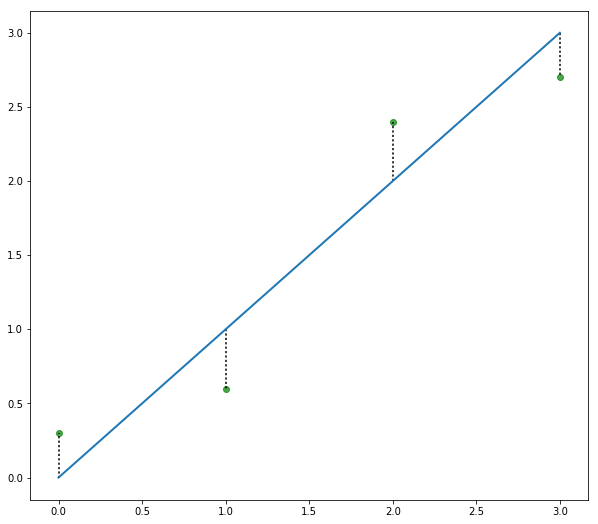

In [3]:
x = np.array([0., 1., 2., 3.])
y = np.array([.3, .6, 2.4, 2.7])
mp.figure(figsize=(10,9))
for i in range(4):
    mp.plot([x[i], x[i]], [x[i], y[i]], c='black', linestyle=':')
mp.scatter(x, y, c='g', alpha=.7)
mp.plot([0, 3], [0, 3], linewidth=2)
mp.show()

$f(x) = w x + b$

$loss = \frac{1}{m} \sum _{i=0}^m (y_i - (w x_i + b))^2$

$\frac{\partial loss}{\partial w} = \frac{1}{m} \sum_{i=0}^m 2x_i(w x_i + b - y_i)$

$\frac{\partial loss}{\partial b} = \frac{1}{m} \sum_{i=0}^m 2(w x_i + b - y_i)$

step0 loss: 3909.5566
step1 loss: 918.3171
step2 loss: 260.2567
step3 loss: 113.1929
step4 loss: 80.0944
step5 loss: 72.7343
step6 loss: 71.1856
step7 loss: 70.9130
step8 loss: 70.8956
step9 loss: 70.9147
step10 loss: 70.9306
step11 loss: 70.9398
step12 loss: 70.9446
step13 loss: 70.9470
step14 loss: 70.9481
step15 loss: 70.9487
step16 loss: 70.9490
step17 loss: 70.9491
step18 loss: 70.9492
step19 loss: 70.9492
60.84421578050496 10.0 | 60.0524478891 10.0564108301 | 70.9492345169


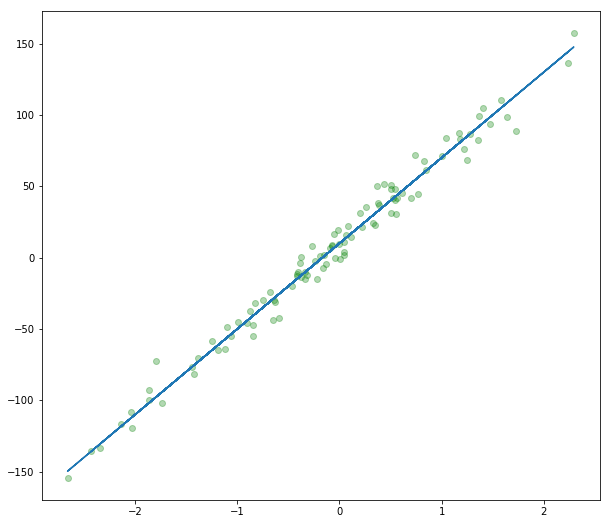

In [4]:
"""创建数据"""
from sklearn.datasets import make_regression
mp.figure(figsize=(10,9))

bias = 10.0
X, Y, coef = make_regression(n_features=1, noise=9, bias=bias, coef=True)

X = X.reshape(-1)

"""损失函数"""
loss = lambda w, b: np.mean([(y - (w * x + b)) ** 2 for x, y in zip(X, Y)])

"""梯度下降"""
def gradient_descent(w, b, lr):
    for x, y in zip(X, Y):
        w -= lr * (((w * x) + b) - y) * x
        b -= lr * (((w * x) + b) - y)
    return w, b

"""运行"""
w, b = .0, .0  # 系数初始化
lr = .007  # learning rate
for i in range(20):
    print('step%d loss: %.4f' % (i, loss(w, b)))
    w, b = gradient_descent(w, b, lr)  # 参数更新
print(coef, bias, '|', w, b, '|', loss(w, b))

"""可视化"""
mp.scatter(X, Y, c='g', alpha=.3)
mp.plot(X, w * X + b)
mp.show()

## 逻辑回归
https://blog.csdn.net/Yellow_python/article/details/81240395

$$L(\theta)= \sum_{i=1}^n (y_i \log h_{\theta}(x_i) + (1-y_i) \log (1-h_{\theta}(x_i)))$$

$$\frac{\partial L(\theta)}{\partial \theta} = \sum_{i=1}^n (y_i - h_{\theta}(x_i))x_i$$

$$\theta^{t+1} = \theta^t + \alpha \frac{1}{n} \sum_{i=1}^n (y_i - h_{\theta}(x_i))x_i$$

**创建随机样本**

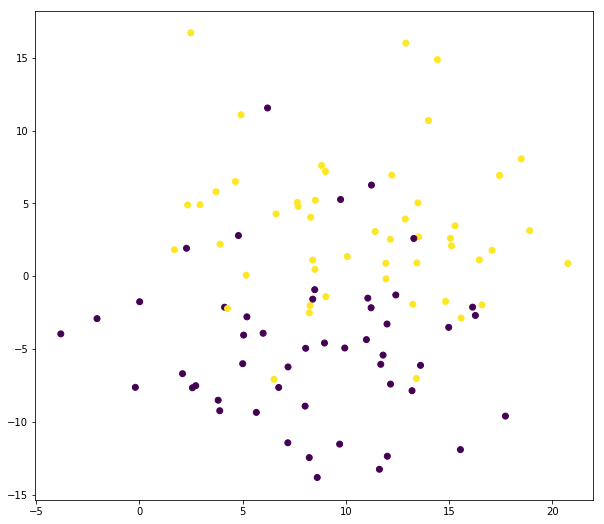

In [5]:
from sklearn.datasets import make_blobs
mp.figure(figsize=(10,9))
X, Y = make_blobs(centers=2, cluster_std=5)
mp.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1))
mp.show()

**Sigmoid**

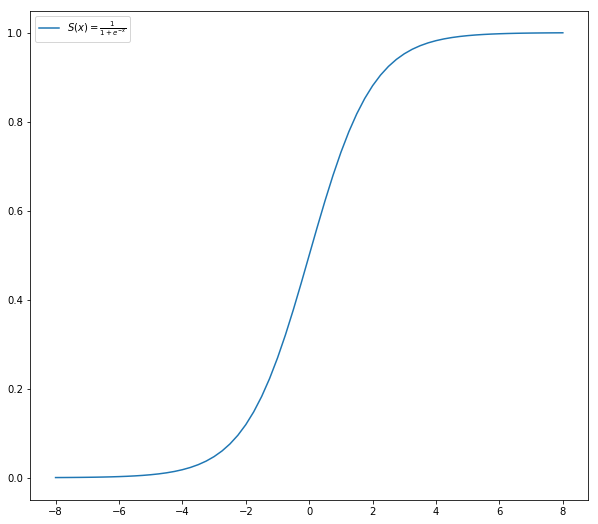

In [6]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-8, 8, 65)
mp.figure(figsize=(10,9))
mp.plot(x, sigmoid(x), label=r'$S(x)=\frac{1}{1+e^{-x}}$')
mp.legend()
mp.show()

$$
h_{\theta}(X) = \frac{1}{1 + e^{X \theta}}
$$

**数据处理**

In [7]:
X = np.insert(X, 0, 1, axis=1)  # 插入一列常量，用于计算偏差
Y = Y.reshape(-1, 1)
X.shape, Y.shape

((100, 3), (100, 1))

$$
X =
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{12} & x_{13} & \cdots & x_{1m} \\
1 & x_{22} & x_{33} & \cdots & x_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n2} & x_{n3} & \cdots & x_{nm} \\
\end{pmatrix}
_{n \times m}
y =
\begin{bmatrix}
	y_1 \\ y_2 \\ \vdots \\ y_n 
\end{bmatrix}
_{n \times 1}
$$

**系数初始化**

In [8]:
d = X.shape[1]  # 维数
theta = np.mat([[1]] * d)  # 系数初始化

$$
\theta =
\begin{bmatrix}
	\theta_1 \\ \theta_2 \\ \vdots \\ \theta_m 
\end{bmatrix}
_{m \times 1}
$$

**梯度上升**

$ \sum_{i=1}^n (h_{\theta}(x_i) - y_i)x_i = \alpha X^T (y - h_{\theta}(X)) $

$ \theta := \theta + \alpha X^T (y - h) $

In [9]:
for i in range(5999, 8999):
    alpha = 1 / i  # 步长（先大后小）
    h = sigmoid(X * theta)
    error = Y - h
    theta = theta + alpha * X.T * error  # 最终梯度上升迭代公式

$$
X \theta =
\begin{pmatrix}
\theta_1 + x_{12} \theta_2 + x_{13} \theta_3 + \cdots + x_{1m} \theta_n \\
\theta_1 + x_{22} \theta_2 + x_{33} \theta_3 + \cdots + x_{2m} \theta_n \\
\vdots \\
\theta_1 + x_{n2} \theta_2 + x_{n3} \theta_3 + \cdots + x_{nm} \theta_n \\
\end{pmatrix}
_{n \times 1}
X^T =
\begin{pmatrix}
1 & 1 & \cdots & 1 \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn} \\
\end{pmatrix}
_{m \times n}
X^T(y-h)_{m \times 1}
$$

![](https://img-blog.csdnimg.cn/2019010421374960.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_50,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1llbGxvd19weXRob24=,size_16,color_FFFFFF,t_70)

**可视化**

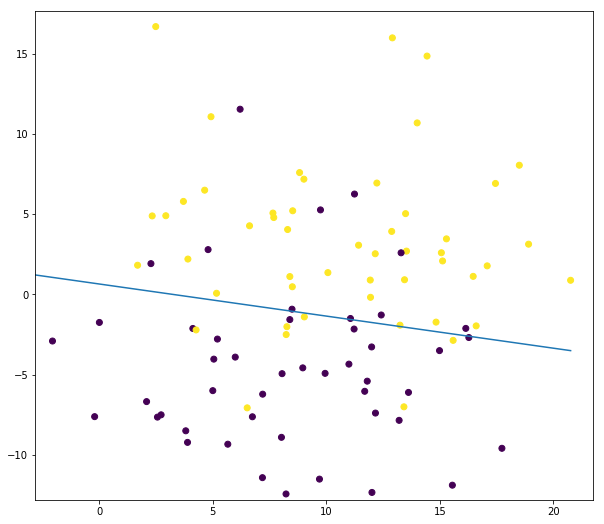

In [10]:
mp.figure(figsize=(10,9))
x1, x2 = X[:, 1], X[:, 2]
mp.axis([x1.min() + 1, x1.max() + 1, x2.min() + 1, x2.max() + 1])
mp.scatter(x1, x2, c=Y.reshape(-1))  # 原始样本点
x = np.array([x1.min(), x1.max()])
y = (-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  # 决策边界
mp.plot(x, y)
mp.show()

## 动态展示

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
%matplotlib qt5
import matplotlib.pyplot as mp, numpy as np
np.random.seed(2)

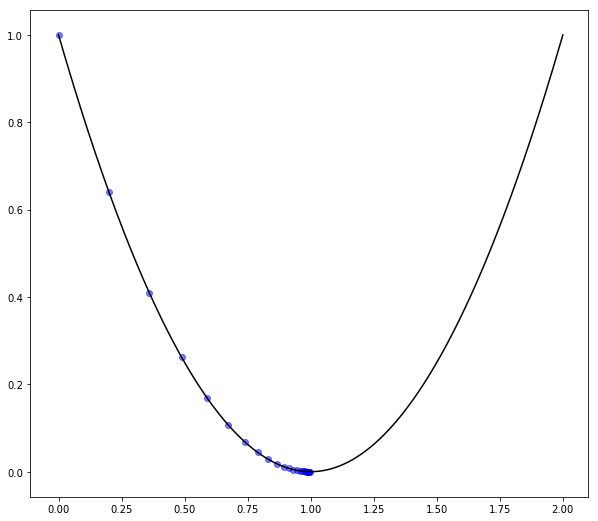

In [12]:
"""原函数"""
fn = lambda x: x ** 2 - 2 * x + 1
x = np.linspace(0, 2, 9999)
mp.figure(figsize=(10,9))
mp.plot(x, fn(x), c='black')  # 绘制函数曲线

"""导数"""
derivative = lambda x: 2 * x - 2

"""梯度下降求极值点"""
extreme_point = 0  # 初始化极值点
alpha = 0.1  # 步长，即学习速率
presision = 0.001  # 允许误差范围
error = np.inf  # 初始化误差
while abs(error) >= presision:  # 误差足够小时退出迭代
    mp.scatter(extreme_point, fn(extreme_point), c='b', alpha=.5)  # 绘制散点
    error = alpha * derivative(extreme_point)  # 步伐
    extreme_point -= error  # 梯度下降
    mp.pause(.1)

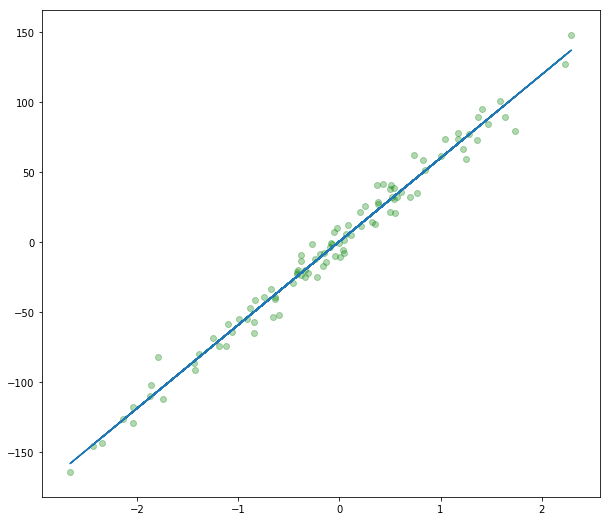

In [13]:
"""创建数据"""
from sklearn.datasets import make_regression

X, Y = make_regression(n_features=1, noise=9, )
X = X.reshape(-1)

"""参数更新"""
def gradient_descent(w, b, lr):
    for x, y in zip(X, Y):
        w -= lr * (((w * x) + b) - y) * x
        b -= lr * (((w * x) + b) - y)
    return w, b

"""运行过程可视化"""
fig, ax = mp.subplots(figsize=(10, 9))
w, b = .0, .0
for i in range(900, 960):
    w, b = gradient_descent(w, b, 1 / i)  # 先大后小的学习率
    ax.cla()  # 清除
    mp.scatter(X, Y, c='g', alpha=.3)  # 散点图
    ax.plot(X, w * X + b)  # 折线图
    mp.pause(.2)  # 限时展示

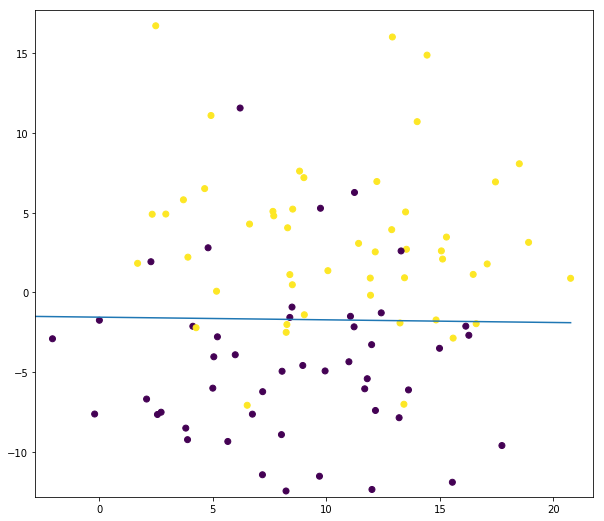

In [14]:
"""创建随机样本"""
from sklearn.datasets import make_blobs
X, Y = make_blobs(centers=2, cluster_std=5)

"""数据处理"""
X = np.insert(X, 0, 1, axis=1)  # 增加一列，用于矩阵相乘
Y = Y.reshape(-1, 1)
x1, x2 = X[:, 1], X[:, 2]

fig, ax = mp.subplots(figsize=(10, 9))  # 创建绘图对象

"""sigmoid函数"""
sigmoid = lambda x: 1 / (1 + np.exp(-x))

"""梯度上升"""
d = X.shape[1]  # 维数
theta = np.mat([[1]] * d)  # 初始化回归系数
for i in range(2000, 2200):
    alpha = 1 / i  # 步长（先大后小）
    h = sigmoid(X * theta)
    theta = theta + alpha * X.T * (Y - h)  # 最终梯度上升迭代公式
    """数据可视化"""
    ax.cla()  # 清除
    ax.axis([x1.min() + 1, x1.max() + 1, x2.min() + 1, x2.max() + 1])
    ax.scatter(x1, x2, c=Y.reshape(-1))  # 原始样本点
    x = np.array([x1.min(), x1.max()])
    y = (-theta[0, 0] - theta[1, 0] * x) / theta[2, 0]  # 决策边界
    ax.plot(x, y)
    mp.pause(1e-9)